In [1]:
import numpy as np
import pandas as pd

# Loads dataset from csv file
# Dataset retrieved from
df = pd.read_csv('star_classification.csv')
df = df.reindex(columns=['obj_ID','alpha','delta','u','g','r','i','z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID','redshift','plate','MJD','class'])
df = df.drop(columns=['rerun_ID'])
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,fiber_ID,redshift,plate,MJD,class
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,171,0.634794,5812,56354,GALAXY
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,427,0.779136,10445,58158,GALAXY
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,299,0.644195,4576,55592,GALAXY
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,775,0.932346,9149,58039,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,842,0.116123,6121,56187,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,438,0.000000,9374,57749,GALAXY
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,866,0.404895,7626,56934,GALAXY
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,74,0.143366,2764,54535,GALAXY
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,470,0.455040,6751,56368,GALAXY


In [2]:
from sklearn.model_selection import train_test_split
# Splits the dataset into training and test sets
X = df.drop(columns='class')
y = df['class']
X = X.to_numpy()
y = y.to_numpy()
# Note: same random_state used as sklearn tutorial example: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train_pre

array([[ 1.23765842e+18,  1.30932167e+02,  4.31341083e+00, ...,
         1.55863500e-01,  1.18800000e+03,  5.26500000e+04],
       [ 1.23766223e+18,  2.25429599e+02,  3.31720833e+01, ...,
        -5.28718800e-04,  2.93500000e+03,  5.46520000e+04],
       [ 1.23765933e+18,  2.19173525e+02,  5.55117400e+01, ...,
        -2.60513700e-04,  3.29600000e+03,  5.49090000e+04],
       ...,
       [ 1.23766138e+18,  1.56991726e+02,  3.86124564e+01, ...,
         2.52848300e-04,  3.26200000e+03,  5.48840000e+04],
       [ 1.23767126e+18,  5.58294316e+01,  9.76439658e+00, ...,
         0.00000000e+00,  2.67900000e+03,  5.43680000e+04],
       [ 1.23766513e+18,  1.89902619e+02,  3.37795907e+01, ...,
         3.52528800e-01,  3.97100000e+03,  5.53220000e+04]])

In [3]:
from sklearn import preprocessing
# Use sklearn preprocessing to normalize both the training and test sets based on the training set
s = preprocessing.StandardScaler().fit(X_train_pre)
X_train = s.transform(X_train_pre)
X_test = s.transform(X_test_pre)
X_train, X_test

(array([[-0.74418429, -0.48390605, -1.00945814, ..., -0.57578196,
         -1.33420844, -1.62135443],
        [-0.29306738,  0.49756661,  0.45809196, ..., -0.78957587,
         -0.74322585, -0.51517188],
        [-0.63710731,  0.43258954,  1.59413054, ..., -0.78920923,
         -0.62110523, -0.37316943],
        ...,
        [-0.39307749, -0.21324531,  0.73475126, ..., -0.78850744,
         -0.6326069 , -0.3869829 ],
        [ 0.778593  , -1.26394079, -0.73225915, ..., -0.7888531 ,
         -0.82982662, -0.67209288],
        [ 0.05115868,  0.128575  ,  0.48898554, ..., -0.30693327,
         -0.39276336, -0.14497093]]),
 array([[ 1.64954625, -1.6676802 , -1.04339136, ..., -0.09680864,
         -0.27740843, -0.04054111],
        [-0.29638243,  0.64955506, -0.91686907, ..., -0.78838172,
         -1.00032188, -0.53727343],
        [ 1.65177643, -1.52299647, -1.16835857, ..., -0.78884751,
          0.74421002,  0.60703429],
        ...,
        [-0.28402596,  0.33124459,  1.30610361, ..., -

In [4]:
from sklearn.linear_model import Perceptron
# Default perceptron classifier (meaning no penalty used for weights)
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
perceptron_train_acc = perceptron_model.score(X_train, y_train)
perceptron_test_acc = perceptron_model.score(X_test, y_test)
print("Training set accuracy: ", round(perceptron_train_acc * 100,2),"%", sep='')
print("Test set accuracy: ", round(perceptron_test_acc * 100,2),"%", sep='')

Training set accuracy: 90.83%
Test set accuracy: 90.65%


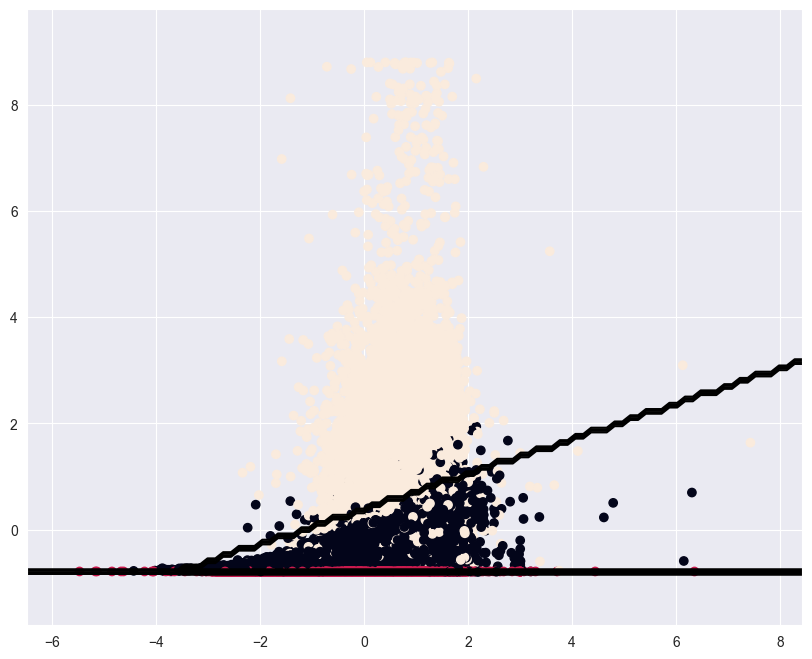

In [5]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Plotting the perceptron decision boundary with 2 of the features (i and redshift)
y_train_colors = np.zeros(len(y_train))
for i in range(0, len(y_train)):
    if y_train[i] == 'GALAXY':
        y_train_colors[i] = 0
    elif y_train[i] == 'STAR':
        y_train_colors[i] = 1
    else:
        y_train_colors[i] = 2

perceptron_model = Perceptron()
perceptron_model.fit(X_train[:,[6,13]], y_train)

# References to tutorial for plotting SVMs from sklearn: https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:,6], X_train[:,13], c=y_train_colors[:])
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(perceptron_model, X_train[:, [6,13]], ax=ax, colors='k', plot_method='contour')
plt.show()

In [6]:
# Now we add an l1 penalty to the perceptron classifier
perceptron_model = Perceptron(penalty='l1')
perceptron_model.fit(X_train, y_train)
perceptron_train_acc = perceptron_model.score(X_train, y_train)
perceptron_test_acc = perceptron_model.score(X_test, y_test)
print("Training set accuracy: ", round(perceptron_train_acc * 100,2),"%", sep='')
print("Test set accuracy: ", round(perceptron_test_acc * 100,2),"%", sep='')

Training set accuracy: 89.56%
Test set accuracy: 89.51%


In [7]:
# Now we add an l2 penalty instead
perceptron_model = Perceptron(penalty='l2')
perceptron_model.fit(X_train, y_train)
perceptron_train_acc = perceptron_model.score(X_train, y_train)
perceptron_test_acc = perceptron_model.score(X_test, y_test)
print("Training set accuracy: ", round(perceptron_train_acc * 100,2),"%", sep='')
print("Test set accuracy: ", round(perceptron_test_acc * 100,2),"%", sep='')

Training set accuracy: 84.9%
Test set accuracy: 84.91%


In [8]:
from sklearn import svm
# For this test, we will use a support vector machine in attempt to improve the linear classifier
linsvm = svm.LinearSVC(max_iter=10000)
linsvm.fit(X_train, y_train)
svm_train_acc = linsvm.score(X_train, y_train)
svm_test_acc = linsvm.score(X_test, y_test)
print("Training set accuracy: ", round(svm_train_acc * 100,2),"%", sep='')
print("Test set accuracy: ", round(svm_test_acc * 100,2),"%", sep='')

Training set accuracy: 93.81%
Test set accuracy: 93.72%


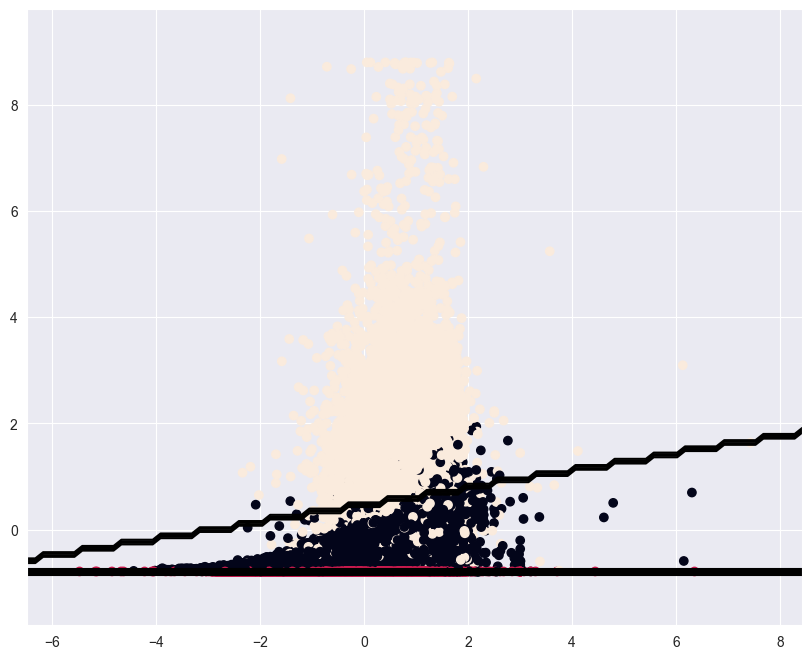

In [9]:
# Create a 2-dimensional support vector machine to pair with the 2-dimensional visualization
linsvm_2d = svm.LinearSVC(max_iter=10000)
linsvm_2d.fit(X_train[:,[6,13]], y_train)

# Also references to tutorial for plotting SVMs from sklearn: https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py
# The main reference is the set of parameters for the DecisionBoundaryDisplayFunction
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:,6], X_train[:,13], c=y_train_colors[:])
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(linsvm_2d, X_train[:, [6,13]], ax=ax, colors='k', plot_method='contour')
plt.show()

In [10]:
# Support vector machine using polynomial kernel of degree = 2
polysvm = svm.SVC(kernel='poly', degree=2)
polysvm.fit(X_train, y_train)
svm_train_acc = polysvm.score(X_train, y_train)
svm_test_acc = polysvm.score(X_test, y_test)
print("Training set accuracy: ", round(svm_train_acc * 100,2),"%", sep='')
print("Test set accuracy: ", round(svm_test_acc * 100,2),"%", sep='')

Training set accuracy: 91.1%
Test set accuracy: 90.99%


In [11]:
# Support vector machine using polynomial kernel of degree = 3
polysvm = svm.SVC(kernel='poly')
polysvm.fit(X_train, y_train)
svm_train_acc = polysvm.score(X_train, y_train)
svm_test_acc = polysvm.score(X_test, y_test)
print("Training set accuracy: ", round(svm_train_acc * 100,2),"%", sep='')
print("Test set accuracy: ", round(svm_test_acc * 100,2),"%", sep='')

Training set accuracy: 93.69%
Test set accuracy: 93.45%


In [12]:
# Support vector machine using polynomial kernel of degree = 4
polysvm = svm.SVC(kernel='poly', degree=4)
polysvm.fit(X_train, y_train)
svm_train_acc = polysvm.score(X_train, y_train)
svm_test_acc = polysvm.score(X_test, y_test)
print("Training set accuracy: ", round(svm_train_acc * 100,2),"%", sep='')
print("Test set accuracy: ", round(svm_test_acc * 100,2),"%", sep='')

Training set accuracy: 92.19%
Test set accuracy: 91.98%
